In [18]:
import pandas as pd

# Caminho para o arquivo CSV
climate_change_data = 'C:/Users/pedrohsq/Downloads/archive/climate_change_data.csv'

# Carrega o arquivo CSV em um DataFrame do pandas
dados_climaticos = pd.read_csv(climate_change_data)

display(dados_climaticos)


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [19]:
print(dados_climaticos.dtypes)
# Resumo estatístico dos dados
display(dados_climaticos.describe())


Date               object
Location           object
Country            object
Temperature       float64
CO2 Emissions     float64
Sea Level Rise    float64
Precipitation     float64
Humidity          float64
Wind Speed        float64
dtype: object


,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


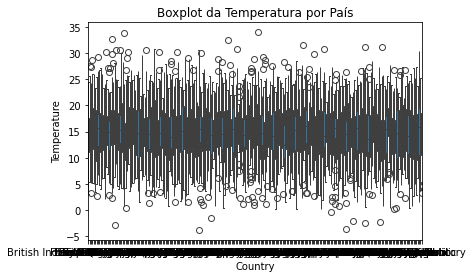

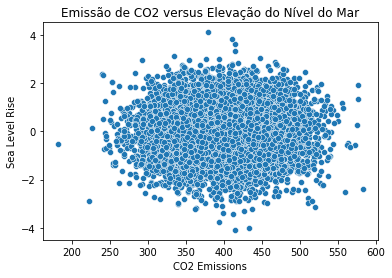

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot da Temperatura por País
sns.boxplot(x='Country', y='Temperature', data=dados_climaticos)
plt.title('Boxplot da Temperatura por País')
plt.show()

# Scatter plot da Emissão de CO2 versus Elevação do Nível do Mar
sns.scatterplot(x='CO2 Emissions', y='Sea Level Rise', data=dados_climaticos)
plt.title('Emissão de CO2 versus Elevação do Nível do Mar')
plt.show()


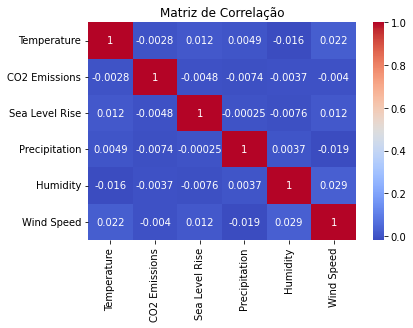

In [23]:
# Matriz de correlação
correlacoes = dados_climaticos.corr()
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


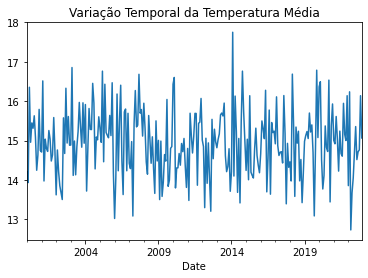

In [24]:
# Convertendo a coluna de data para tipo datetime
dados_climaticos['Date'] = pd.to_datetime(dados_climaticos['Date'])

# Realizando análise temporal da temperatura média
dados_climaticos_temporal = dados_climaticos.set_index('Date')
dados_climaticos_temporal['Temperature'].resample('M').mean().plot()
plt.title('Variação Temporal da Temperatura Média')
plt.show()


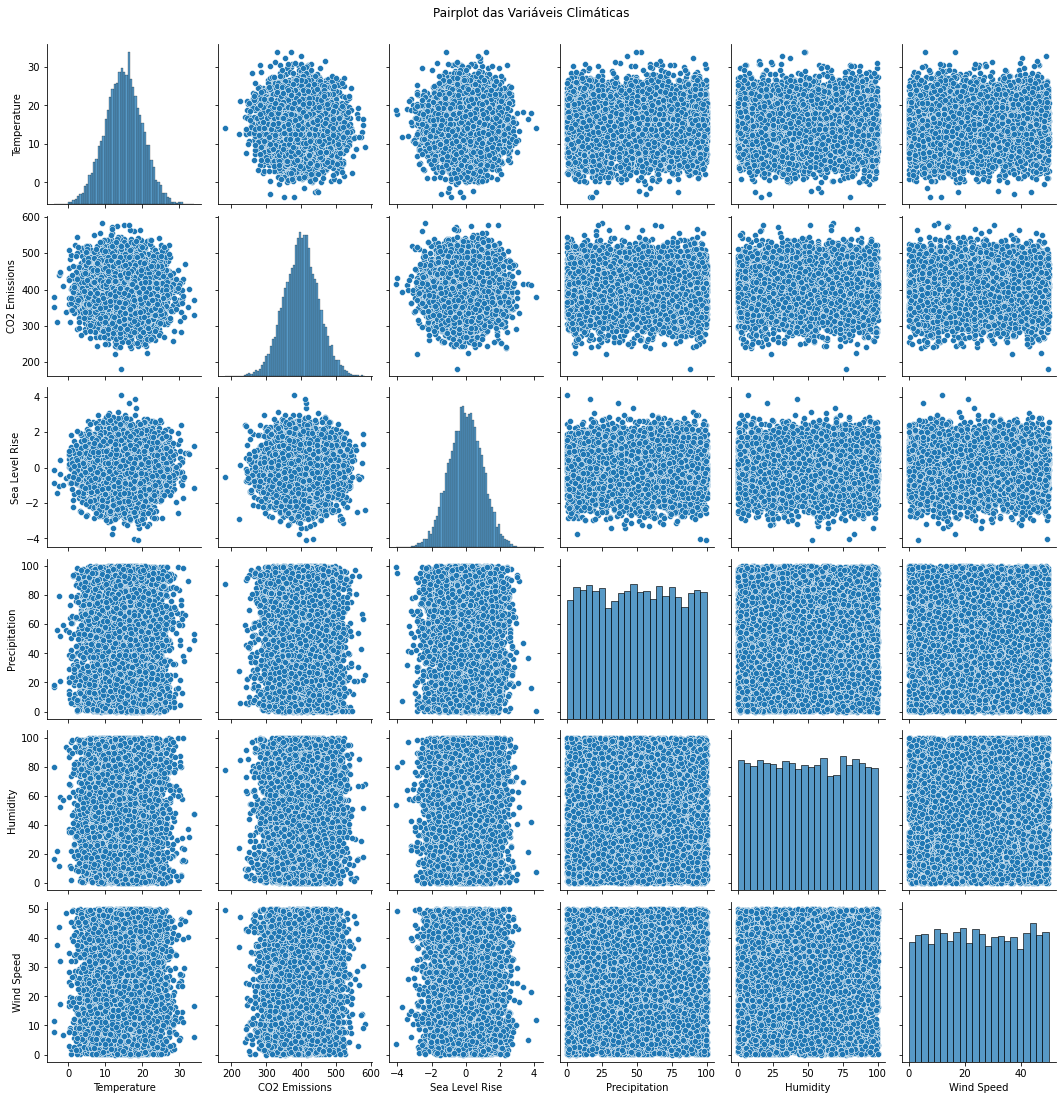

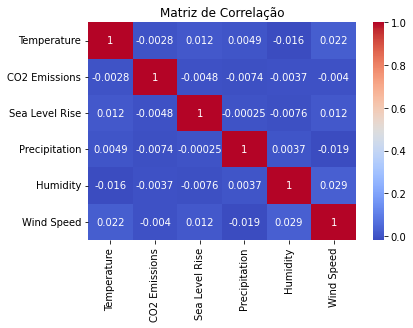

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot para visualizar relações entre variáveis
sns.pairplot(dados_climaticos[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']])
plt.suptitle('Pairplot das Variáveis Climáticas', y=1.02)
plt.show()

# Correlação entre variáveis
correlacoes = dados_climaticos.corr()
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


Erro Quadrático Médio (MSE): 25.753053996544573
Raiz Quadrada do Erro Quadrático Médio (RMSE): 5.074746692845326


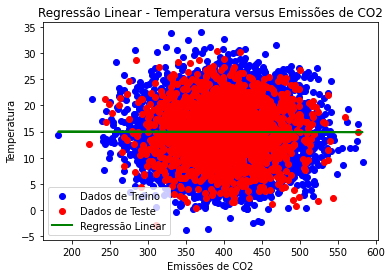

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecionar variável independente (X) e dependente (y)
X = dados_climaticos[['CO2 Emissions']]
y = dados_climaticos['Temperature']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear
modelo_regressao = LinearRegression()

# Treinar o modelo
modelo_regressao.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
previsoes = modelo_regressao.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
rmse = np.sqrt(mse)
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")

# Visualizar a linha de regressão no conjunto de treino
plt.scatter(X_train, y_train, color='blue', label='Dados de Treino')
plt.scatter(X_test, y_test, color='red', label='Dados de Teste')
plt.plot(X_train, modelo_regressao.predict(X_train), color='green', linewidth=2, label='Regressão Linear')
plt.title('Regressão Linear - Temperatura versus Emissões de CO2')
plt.xlabel('Emissões de CO2')
plt.ylabel('Temperatura')
plt.legend()
plt.show()
